In [16]:
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
from mpl_toolkits.mplot3d import Axes3D
np = numpy
plt = pyplot

from pylab import *
from numpy import *

%matplotlib qt

In [2]:
from matplotlib import cm
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

In [21]:
matplotlib.rcParams['figure.figsize'] = [10.5,7]
matplotlib.rcParams.update({'font.size': 20})

In [4]:
# pas top pour avoir cov avec barre erreur
def lin_fit(y1,y2,deg):
    p=polyfit(y1,y2,deg) # obtention coefficients fit
    return poly1d(p) # génération fonction

In [5]:
# Constantes de la physique
# ABSOLUMENT RECHARGER APRÈS AVOIR EXECUTÉ LES CASES D'IMPORT AU DESSUS

C_e = 1.602e-19        # Coulomb
kb = 1.38064852*1e-23  # Boltzman
m_Ca = 40.078*1.66054e-27 # masse Ca 40.078
m_GM = 1e6*1.66054e-27 # la masse de la GMol
eps0 = 8.854187*1e-12  # permittivité électrique du vide


r0 = 2.5e-3 # 2.5e-3   # rayon piège Ca+
d0 = (4e-3)/2            # longueur piège Ca+
Omega = 2.045e6*2*pi # 2.047e6
bk = 4 # nombre de barreaux par groupe (2 -> 4-pole , 4 -> 8-pole ...)

mkappa = 0.23          # écrantage piège réel GiantMol
wzLC = (2*pi*90806.9982303)**2
kappa_simion = m_Ca*d0**2*wzLC/(2*C_e)
print('%s = %f' % ('$\kappa_{simion}$',kappa_simion) )

zeta = kappa_simion*r0**2/d0**2

$\kappa_{simion}$ = 0.270471


In [6]:
# # Mathieu Barre erreur
# # on peut lui donner barre erreur pour calcul variance
# def function_(x,a,b) :
#     return cos(a*x+b)*rand(1)*x
# x=arange(0,10,0.1)
# A = rand(1)
# B=0.2*rand(1)
# to_fit = function_(x,A,B) # pts xp
# fit_ , pcov = curve_fit(function_,x,to_fit,p0=[A,B]) # le fit
# ERR_fit = np.sqrt(np.diag(pcov)) # 1sigma variance
# figure('function_').clf()
# plt.plot(x,to_fit,label='data')
# plt.errorbar(x,function_(x,fit_[0],fit_[1]),yerr=ERR_fit[0],label='FIT')
# plt.legend()

# Extraction de données

In [7]:
filename=[]

In [8]:
# sélection des fichiers (Python 3)
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename(initialdir = '/home/adrian/Documents/Mesures',multiple=True)
file_path
# /home/adrian/Documents/Mesures/20180503/

('/home/adrian/Documents/Mesures/GiantMol_Ions/20180503/tickle_120-8vpp_2500mv_167k_367k_000.dat',
 '/home/adrian/Documents/Mesures/GiantMol_Ions/20180503/tickle_129-9vpp_2500mv_167k_367k_000.dat',
 '/home/adrian/Documents/Mesures/GiantMol_Ions/20180503/tickle_139-8vpp_2500mv_167k_367k_000.dat',
 '/home/adrian/Documents/Mesures/GiantMol_Ions/20180503/tickle_149-7vpp_2500mv_167k_367k_000.dat',
 '/home/adrian/Documents/Mesures/GiantMol_Ions/20180503/tickle_160-3vpp_2500mv_167k_367k_000.dat',
 '/home/adrian/Documents/Mesures/GiantMol_Ions/20180503/tickle_170-3vpp_2500mv_167k_367k_000.dat',
 '/home/adrian/Documents/Mesures/GiantMol_Ions/20180503/tickle_180-3vpp_2500mv_167k_367k_000.dat',
 '/home/adrian/Documents/Mesures/GiantMol_Ions/20180503/tickle_190-3vpp_2500mv_167k_367k_001.dat')

In [9]:
filename=file_path
# Temps, PM, Tension Pzt bleu
TP = zeros((len(filename),999))
PM = zeros((len(filename),999),int)
VB = zeros((len(filename),999))
for k in range(0,len(filename),1):
    TP[:][k],PM[:][k],VB[:][k] = loadtxt('%s' %filename[k],usecols=(0,1,3),unpack=True)  

In [10]:
for k in range(0,len(file_path)):
    print(file_path[k][60:90])
print(file_path[1][63:85])

_120-8vpp_2500mv_167k_367k_000
_129-9vpp_2500mv_167k_367k_000
_139-8vpp_2500mv_167k_367k_000
_149-7vpp_2500mv_167k_367k_000
_160-3vpp_2500mv_167k_367k_000
_170-3vpp_2500mv_167k_367k_000
_180-3vpp_2500mv_167k_367k_000
_190-3vpp_2500mv_167k_367k_001
9-9vpp_2500mv_167k_367


In [11]:
start = 167
end = 367
n_pts = len(PM[0])
delta = (end - start)/n_pts

freq=linspace(start,end,n_pts)

test_min = []
for k in range(len(file_path)):
    test_min.append([])
    max_PM = max(PM[k])
    rows = argrelextrema(PM[k],less,order=50)
    for l,m in enumerate(rows[0]):
        if PM[k,m] < 0.85*max_PM:
            test_min[k].append( m*delta + start )
    print(len(test_min[k]))

3
3
3
7
2
4
4
3


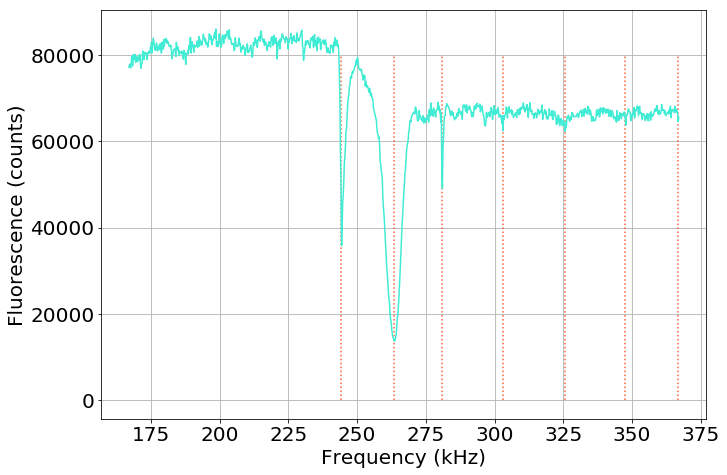

In [12]:
cm = pylab.get_cmap('rainbow')

to_plot =  3
figure('Plot tickle seul').clf()
plot(freq[0:len(PM[to_plot])],PM[to_plot],color = cm(1.*to_plot/len(file_path)))
plt.vlines(x=test_min[to_plot],ymin = 0,ymax = 80000,linestyle = ':',color = cm(1.*k/len(file_path)))
xlabel('Frequency (kHz)')
ylabel('Fluorescence (counts)')
grid()
plt.tight_layout()

In [13]:
to_delete=[[],
[],
[],
[2,3,4,5,6],
[],
[3],
[3],
[]]

for k in range(len(file_path)):
    test_min[k] = list(delete(test_min[k],to_delete[k]))

test_min[3] = [244.27727727727728,0, 263.4964964964965]
test_min[4] = [0,262.2952952952953, 283.91691691691693]
for k in range(len(file_path)):
    print(len(test_min[k]))

3
3
3
3
3
3
3
3


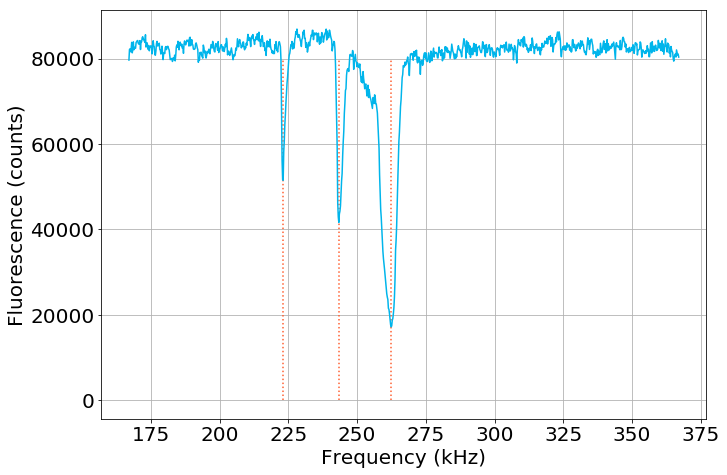

In [14]:
# plot one curve

to_plot = 2
figure('Plot tickle seul').clf()
plot(freq[0:len(PM[to_plot])],PM[to_plot],color = cm(1.*to_plot/len(file_path)))
plt.vlines(x=test_min[to_plot],ymin=0,ymax=80000,linestyle=':',color = cm(1.*k/len(file_path)))
xlabel('Frequency (kHz)')
ylabel('Fluorescence (counts)')
grid()
plt.tight_layout()

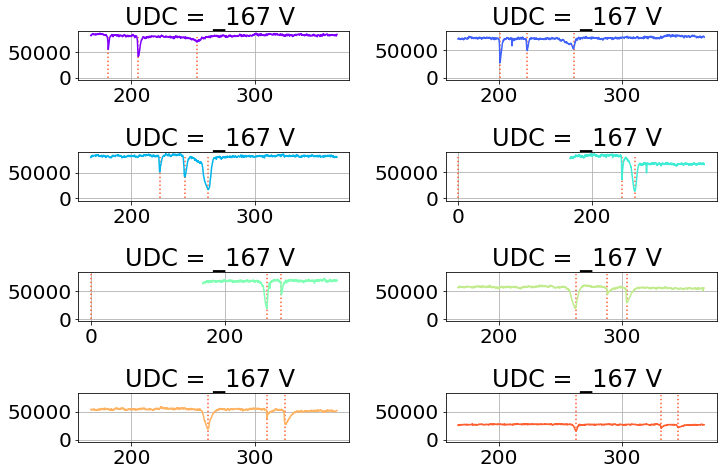

In [15]:
# true_min=[]
# for k in range(0,len(file_path)):
#     temp_min=[]
#     for l in range(0,3):
#         idx = argmin(asarray(test_min[0])[:])
#         temp_min.append(idx)
#         delete(test_min,idx)
#     true_min.append(temp_min)
# print(true_min)
figure('Plot tickle blabl')
clf()

for to_plot in range(0,len(file_path)):
    subplot(4,2,to_plot+1)
    
    title('UDC = '+ file_path[to_plot][76:80] + ' V ')
#     title('UDC = '+ file_path[to_plot][65:73] + ' V : ' + file_path[to_plot][90:93])

    plot(freq[0:len(PM[to_plot])],PM[to_plot],color = cm(1.*to_plot/len(file_path)))
    plt.vlines(x=test_min[to_plot],ymin=0,ymax=80000,linestyle=':',color = cm(1.*k/len(file_path)))

#     for k in range(0,len(file_path)):
#         plt.text(toto[to_plot,k],10000,k,fontsize=10,ha='center')
    
    grid()
    
tight_layout()

In [17]:
kappa_from_fit = 0.22692826986753578

def f_r_fit(x,a):
    aazz = 8*kappa_from_fit*C_e/(m*d0**2*Omega**2)*2.5
    qq = 2*C_e/(m_Ca*r0**2*Omega**2)
    return 0.5*2.05e6*sqrt(0.5*(qq*x)**2+a-0.5*aazz)

In [18]:
popt, pcov = curve_fit(f_r_fit,URF_for_fit,w_for_fit*1000,p0=[1e-3])
print(popt,pcov)

NameError: name 'URF_for_fit' is not defined

In [26]:
URF=divide([120.8,129.9,139.8,149.7,160.3,170.3,180.3,190.3],4)
lines=[[0,0,0,0,0,1,1,1], # fx
       [1,1,1,1,2,2,2,2], # fy
       [2,2,2,2,1,0,0,0]] # 2fz
lines=asmatrix(lines)

w = zeros((3,8))
for k in range(3):
    for l in range(len(URF)):
        w[k,l] = test_min[l][lines[k,l]]

cm2 = pylab.get_cmap('hsv')
span=linspace(29,48.5,10000)
f_z_theo = 1/2/pi*sqrt(2*C_e*kappa_from_fit/m_Ca/d0**2*2.5)
f_u_theo = sqrt(2*(C_e*span/m_Ca/Omega/r0**2)**2)/2/pi
f_r_theo = sqrt(f_u_theo**2-0.5*f_z_theo**2)

my_labels = [r'$f_x$',r'$f_y$',r'$2f_z$']
my_k = [1,2,0]
dy=[2,3,6]

fig=figure('tickle minimum',clear='True')
fig.set_size_inches(12, 7)
ax = fig.add_subplot(1, 1, 1)
for k in range(3): # URF
#         plot(URF[k],asmatrix(save_min[k]),'+',color=cm(1.*k/len(file_path)),mew=2,ms=8,label='_nolegend_')
    ax.errorbar(URF,w[k],yerr=dy[k],
             fmt='+',mew='4',ms='12',color=cm2(1.*my_k[k]/3),
             ecolor='black',elinewidth=2,capsize=0,
            label=my_labels[k])
    
ax.hlines(f_z_theo/1000*2,29,48.5,
          linestyle=':',color='xkcd:black',label='$2f_z$ theoretical')
ax.plot(span,f_r_theo/1000,
          linestyle=(0, (3, 10, 1, 10, 1, 10)),color='xkcd:black',label='$f_r$ theoretical')

# for the fit of fx and fy
# works bad
# w_for_fit = w[0]
# w_for_fit = w_for_fit[w_for_fit != 0]
# URF_for_fit = array( [URF[x] for x in range(len(URF)) if w[0,x]!=0] )

# ax.scatter(URF_for_fit,w_for_fit,marker='4',s=300)

# popt, pcov = curve_fit(f_r_fit,URF_for_fit,w_for_fit*1000)
# ax.plot(span,f_r_fit(span,popt )/1000 )


# f_z_mano = 1/2/pi*sqrt(2*C_e*kappa_from_fit/m_Ca/d0**2*2.5)
# f_u_mano = sqrt(2*(C_e*span/m_Ca/Omega/r0**2)**2)/2/pi*1.08
# f_r_mano = sqrt(f_u_mano**2-0.5*f_z_mano**2)
# ax.plot(span,sqrt( f_r_mano**2 - 0.5*f_z_mano )/1000)

# (0, (3, 10, 1, 10, 1, 10))

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=2.5))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=25)) 
    
ax.legend()
    
ax.set_xlabel('$U_{RF}$ [V]')
ax.set_ylabel('Frequency [kHz]')
ax.set_ylim(174,353)
grid()
tight_layout()

In [487]:
popt

array([0.04413982])

In [401]:
popt, pcov = curve_fit(f_r_fit,URF_for_fit,w_for_fit,p0=[1e-3] )
print(popt,pcov)

[0.001] [[inf]]


/home/adrian/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [384]:
popt,pcov

(array([2.27015943e-48]), array([[inf]]))

In [389]:
(2*C_e/m/r0**2/Omega/(2*sqrt(2)*pi))**2

2.5223993670479615e-49

In [368]:
URF_for_fit = [URF[x] for x in range(len(URF)) if w[0,x]!=0]
print(URF_for_fit)

[30.2, 32.475, 34.95, 37.425, 42.575, 45.075, 47.575]


In [392]:
e=1.602e-19
m=40.078*1.66054e-27 # 40.078

r0=2.5e-3 # 2.5e-3
d0=4e-3/2

Omega=2.047e6*2*pi # 2.047e6

In [393]:
Udc=0
kappa=0.22481324
zeta=kappa*r0**2/d0**2
Vend=2.5

In [401]:
dw=r0**(-1)*sqrt((e/m)*(Udc-zeta*Vend+0.5*e/(m*r0**2*Omega**2)*URF**2))
print('dw')
for k in range(0,len(dw)):
    print('{:.1f}'.format(dw[k]/1000/(2*pi)),'kHz')
    
dw2=Omega*0.5*sqrt(4*e/(m*r0**2*Omega**2)*(Udc-zeta*Vend)+2*(e/(m*r0**2*Omega**2))**2*URF**2)
print('dw2')
for k in range(0,len(dw2)):
    print('{:.1f}'.format(dw2[k]/1000/(2*pi)),'kHz')

    
ax=4*e/(m*r0**2*Omega**2)*(Udc-Vend)
q=2*e*URF/(m*r0**2*Omega**2)
dw3=Omega*0.5*sqrt(ax+q**2/2)
print('dw2')
for k in range(0,len(dw2)):
    print('{:.1f}'.format(dw3[k]/1000/(2*pi)),'kHz')

dw
42.3 kHz
58.4 kHz
72.8 kHz
83.2 kHz
98.3 kHz
109.6 kHz
120.4 kHz
130.9 kHz
dw2
42.3 kHz
58.4 kHz
72.8 kHz
83.2 kHz
98.3 kHz
109.6 kHz
120.4 kHz
130.9 kHz
dw2
nan kHz
nan kHz
nan kHz
nan kHz
nan kHz
nan kHz
nan kHz
36.3 kHz


/home/adrian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


In [397]:
w=[]
for k in range(0,len(file_path)): # URF
    temp=[]
    for l in range(0,4):
#         plot(URF[k],asmatrix(save_min[k]),'+',color=cm(1.*k/len(file_path)),mew=2,ms=8,label='_nolegend_')
        temp.append(save_min[k,lines[l,k]])
    w.append(temp)
w=asmatrix(w)
dwmes=zeros(8)
for k in range(0,8):
    dwmes[k]=w[k,1]-w[k,0]
print('dwmes',dwmes,'kHz')

dwmes [24.2 22.2 20.2 14.8 16.8 15.6 15.2 14.2] kHz


In [396]:
-zeta*Vend,0.5*e/(m*r0**2*Omega**2)*URF

(-0.87817671875,
 array([0.03515674, 0.03780514, 0.04068636, 0.04298552, 0.04665253,
        0.04956286, 0.05247319, 0.05538351]))